<a href="https://www.kaggle.com/code/vladislavbugaichenko/ingredients-to-dishes?scriptVersionId=163290440" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install --upgrade together
!pip install accelerate
!pip install -i https://test.pypi.org/simple/ bitsandbytes

  Obtaining dependency information for together from https://files.pythonhosted.org/packages/ef/9c/ff58694ce629171db4563ec0a8c274a1c6b2804526c8ed204d3e61912498/together-0.2.11-py3-none-any.whl.metadata
  Obtaining dependency information for pydantic<3.0.0,>=2.5.0 from https://files.pythonhosted.org/packages/db/dc/afecbd9650f486889181c6d1a0d675b580c06253ea7e304588e4c7485bdb/pydantic-2.6.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 1.3 MB/s eta 0:00:00
  Obtaining dependency information for sseclient-py<2.0.0,>=1.7.2 from https://files.pythonhosted.org/packages/49/58/97655efdfeb5b4eeab85b1fc5d3fa1023661246c2ab2a26ea8e47402d4f2/sseclient_py-1.8.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic-core==2.16.2 from https://files.pythonhosted.org/packages/50/5e/2978d9f0e8d0cfd78e22115c028a41e0599e3d684e5aef7ed9bd18fcbd0c/pydantic_core-2.16.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining de

In [2]:
import re
import requests
import torch

from transformers import pipeline
from PIL import Image
from transformers import AutoProcessor, LlavaForConditionalGeneration

from collections import Counter

import together

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
model_id = "llava-hf/llava-1.5-7b-hf"

model = LlavaForConditionalGeneration.from_pretrained(
    model_id, 
    torch_dtype=torch.float16, 
    low_cpu_mem_usage=True,
    load_in_4bit=True
)

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /opt/conda/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/opt/conda/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:147: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/nvidia/lib'), PosixPath('/usr/local/lib/x86_64-linux-gnu'), PosixPath('/usr/local/cuda/lib')}
  warn(msg)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [4]:
processor = AutoProcessor.from_pretrained(model_id)

preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


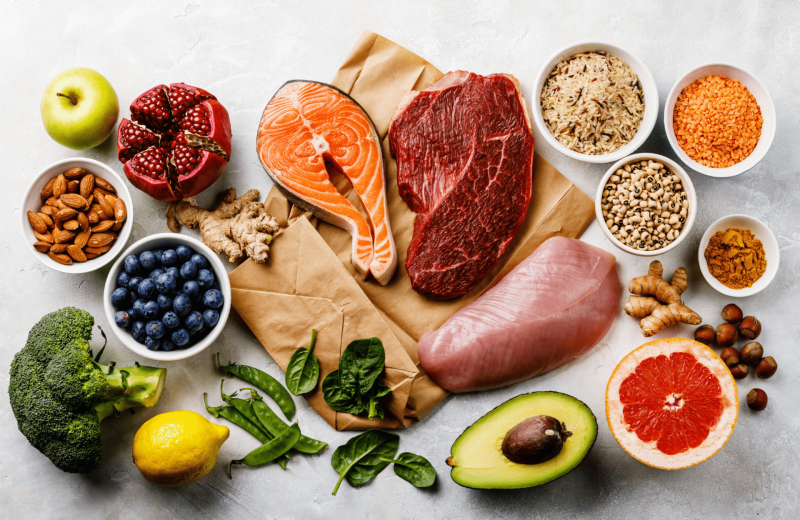

In [5]:
image_path = "/kaggle/input/ingredients/Camerons-Kitchen-Healthy-Ingredients-1-800x520.png"
prompt = "USER: <image>\nIdentify and list the food ingredients present. Output the names of the ingredients in the following format:\n1. Ingredient1\n2. Ingredient2\n3. Ingredient3. Name only those ingredients that are in the image provided.\nASSISTANT:"
image = Image.open(image_path)
Image.open(image_path)

In [6]:
inputs = processor(prompt, image, return_tensors='pt').to(0, torch.float16)
output = model.generate(**inputs, max_new_tokens=100, do_sample=False)
response = processor.decode(output[0][2:], skip_special_tokens=True)

In [7]:
# Use regular expression to find ingredients
ingredient_pattern = re.compile(r'\d+\.\s(.+?)\n')
ingredients = ingredient_pattern.findall(response)[3:]

In [8]:
# Count the frequency of each ingredient
ingredient_counts = Counter(ingredients)

# Create a new list with each ingredient appearing no more than four times
filtered_ingredients = []
for ingredient, count in ingredient_counts.items():
    filtered_ingredients.extend([ingredient] * min(count, 3))

# Print the filtered ingredients
print("Filtered Ingredients:", filtered_ingredients)

Filtered Ingredients: ['Avocado', 'Lime', 'Blueberries', 'Kiwi', 'Ginger', 'Lemon', 'Pineapple', 'Meat (beef, chicken, or pork)', 'Fish (salmon)', 'Nuts (peanuts or almonds)', 'Raspberries', 'Spinach', 'Squash']


In [9]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
key = user_secrets.get_secret("together_api_key")
together.api_key = key

In [10]:
output = together.Complete.create(
  prompt = f"GPT4 Correct User:You are a professional chef who offers many options for dishes that can be prepared based on the ingredients provided\nHere is a list of ingredients: {', '.join(filtered_ingredients)}, what can I cook using only this ingredients? Provide names of the possible dishes along with their description in form of numbered list. Desired output format: 1. Dish name:\n Description\n.<|end_of_turn|>GPT4 Correct Assistant:", 
  model = "openchat/openchat-3.5-1210", 
  max_tokens = 700,
  temperature = 0.4,
  top_k = 95,
  top_p = 0.8,
  repetition_penalty = 1.3,
  stop = ['<|end_of_turn|>']
)

# print generated text
print(output['output']['choices'][0]['text'])

1. Dish name: Grilled Pineapple Salsa
Description: A refreshing salsa made with grilled pineapple, avocado, blueberries, kiwi, lime, and ginger. Serve with tortilla chips or as a topping for grilled meats.
2. Dish name: Spinach and Berry Salad
Description: A healthy salad with fresh spinach, blueberries, raspberries, and sliced kiwi, tossed in a lemon-lime dressing and topped with toasted almonds.
3. Dish name: Ginger-Lime Marinated Fish
Description: Salmon fillets marinated in a ginger-lime sauce, then grilled or pan-seared. Served with a side of grilled squash and a pineapple-avocado salsa.
4. Dish name: Lemon-Ginger Chicken Stir-Fry
Description: Stir-fried chicken with ginger, lemon zest, and vegetables like squash and spinach, served over steamed rice and garnished with chopped peanuts.
5. Dish name: Pineapple-Beef Skewers
Description: Cubed beef and pineapple chunks skewered and grilled to perfection, served with a side of avocado-blueberry salsa and a ginger-lime dipping sauce.
6